In [5]:
import pandas as pd 

In [6]:
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
# Leemos el DataFrame sobre el que vamos a trabajar
covid = pd.read_csv("owid-covid-data.csv")

# Cambiamos el formato de la columna data a datetime
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')

# Renombramos la columna "location" y la llamamos "country" y "human_development_index": "HDI"
covid.rename(columns={"location": "country", "human_development_index": "HDI"}, inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89679 entries, 0 to 89678
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               89679 non-null  object        
 1   continent                              85406 non-null  object        
 2   country                                89679 non-null  object        
 3   date                                   89679 non-null  datetime64[ns]
 4   total_cases                            86654 non-null  float64       
 5   new_cases                              86652 non-null  float64       
 6   new_cases_smoothed                     85651 non-null  float64       
 7   total_deaths                           76856 non-null  float64       
 8   new_deaths                             77014 non-null  float64       
 9   new_deaths_smoothed                    85651 non-null  float6

In [8]:
# Creamos un DataFrame con las columnas que queremos
covid_data = covid.filter(["continent", "country", "median_age", "aged_65_older", "aged_70_older", "total_cases", "total_deaths", "hospital_beds_per_thousand", "gdp_per_capita", "HDI"], axis=1)


# Eliminamos los valores Nan y reseteamos el índice
covid_data.dropna(inplace=True)
covid_data.reset_index(drop=True, inplace=True)
covid_data

,continent,country,median_age,aged_65_older,aged_70_older,total_cases,total_deaths,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Afghanistan,18.6,2.581,1.337,34.0,1.0,0.5,1803.987,0.511
1,Asia,Afghanistan,18.6,2.581,1.337,41.0,1.0,0.5,1803.987,0.511
2,Asia,Afghanistan,18.6,2.581,1.337,43.0,1.0,0.5,1803.987,0.511
3,Asia,Afghanistan,18.6,2.581,1.337,76.0,2.0,0.5,1803.987,0.511
4,Asia,Afghanistan,18.6,2.581,1.337,80.0,3.0,0.5,1803.987,0.511
...,...,...,...,...,...,...,...,...,...,...
61945,Africa,Zimbabwe,19.6,2.822,1.882,38535.0,1582.0,1.7,1899.775,0.571
61946,Africa,Zimbabwe,19.6,2.822,1.882,38554.0,1582.0,1.7,1899.775,0.571
61947,Africa,Zimbabwe,19.6,2.822,1.882,38560.0,1582.0,1.7,1899.775,0.571
61948,Africa,Zimbabwe,19.6,2.822,1.882,38572.0,1582.0,1.7,1899.775,0.571


In [9]:
covid_groupby = covid_data.groupby("country").max()
covid_groupby.reset_index(inplace=True)

# Añadimos nuevas columnas: el ratio de muertes y el porcentaje de personas con menos y más riesgo de muerte

covid_groupby["deaths_ratio"] = covid_groupby["total_deaths"]/covid_groupby["total_cases"] * 100
covid_groupby["non_risky_age"] = 100 - covid_groupby["aged_65_older"] - covid_groupby["aged_70_older"]
covid_groupby["risky_age"] = 100 - covid_groupby["non_risky_age"]

# Reordeno las columnas
covid_groupby = covid_groupby[["continent", "country", "median_age", "aged_65_older", "aged_70_older", "non_risky_age", "risky_age", "total_cases", "total_deaths", "deaths_ratio", "hospital_beds_per_thousand", "gdp_per_capita", "HDI"]]

covid_groupby

,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI
0,Asia,Afghanistan,18.6,2.581,1.337,96.082,3.918,63819.0,2751.0,4.310628,0.50,1803.987,0.511
1,Europe,Albania,38.0,13.188,8.643,78.169,21.831,132071.0,2436.0,1.844462,2.89,11803.431,0.795
2,Africa,Algeria,29.1,6.211,3.857,89.932,10.068,125693.0,3388.0,2.695456,1.90,13913.839,0.748
3,North America,Antigua and Barbuda,32.1,6.933,4.631,88.436,11.564,1251.0,42.0,3.357314,3.80,21490.943,0.778
4,South America,Argentina,31.9,11.198,7.441,81.361,18.639,3371508.0,71771.0,2.128751,5.00,18933.907,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,South America,Venezuela,29.0,6.614,3.915,89.471,10.529,217603.0,2428.0,1.115793,0.80,16745.022,0.711
151,Asia,Vietnam,32.6,7.150,4.718,88.132,11.868,4512.0,37.0,0.820035,2.60,6171.884,0.704
152,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.70,1479.147,0.470
153,Africa,Zambia,17.7,2.480,1.542,95.978,4.022,92520.0,1263.0,1.365110,2.00,3689.251,0.584


In [10]:
# Leemos el csv de pobreza
pobreza = pd.read_csv("pobreza_ratio.csv")
pobreza.rename(columns={"Country": "country"}, inplace=True)

# Unimos el DataFrame "covid_data_groupby" con este de pobreza
covid_data_pobreza = pd.merge(covid_groupby, pobreza, on="country")
covid_data_pobreza.drop("Unnamed: 0", axis=1, inplace=True)
covid_data_pobreza


,continent,country,median_age,aged_65_older,aged_70_older,non_risky_age,risky_age,total_cases,total_deaths,deaths_ratio,hospital_beds_per_thousand,gdp_per_capita,HDI,Poverty %
0,Europe,Albania,38.0,13.188,8.643,78.169,21.831,132071.0,2436.0,1.844462,2.89,11803.431,0.795,1.10
1,Africa,Algeria,29.1,6.211,3.857,89.932,10.068,125693.0,3388.0,2.695456,1.90,13913.839,0.748,0.80
2,South America,Argentina,31.9,11.198,7.441,81.361,18.639,3371508.0,71771.0,2.128751,5.00,18933.907,0.845,1.30
3,Asia,Armenia,35.7,11.232,7.571,81.197,18.803,221139.0,4346.0,1.965280,4.20,8787.580,0.776,2.40
4,Oceania,Australia,37.9,15.504,10.129,74.367,25.633,29992.0,910.0,3.034142,3.84,44648.710,0.944,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,North America,United States,38.3,15.413,9.732,74.855,25.145,32997331.0,587219.0,1.779595,2.77,54225.446,0.926,1.50
114,South America,Uruguay,35.6,14.655,10.361,74.984,25.016,246026.0,3578.0,1.454318,2.80,20551.409,0.817,0.40
115,Asia,Yemen,20.3,2.922,1.583,95.495,4.505,6586.0,1297.0,19.693289,0.70,1479.147,0.470,18.11
116,Africa,Zambia,17.7,2.480,1.542,95.978,4.022,92520.0,1263.0,1.365110,2.00,3689.251,0.584,57.80


In [11]:
covid_data.to_csv("0-covid_data.csv")
covid_groupby.to_csv("0-covid_groupby.csv")
covid_data_pobreza.to_csv("0_covid_pobreza.csv")

<AxesSubplot:>

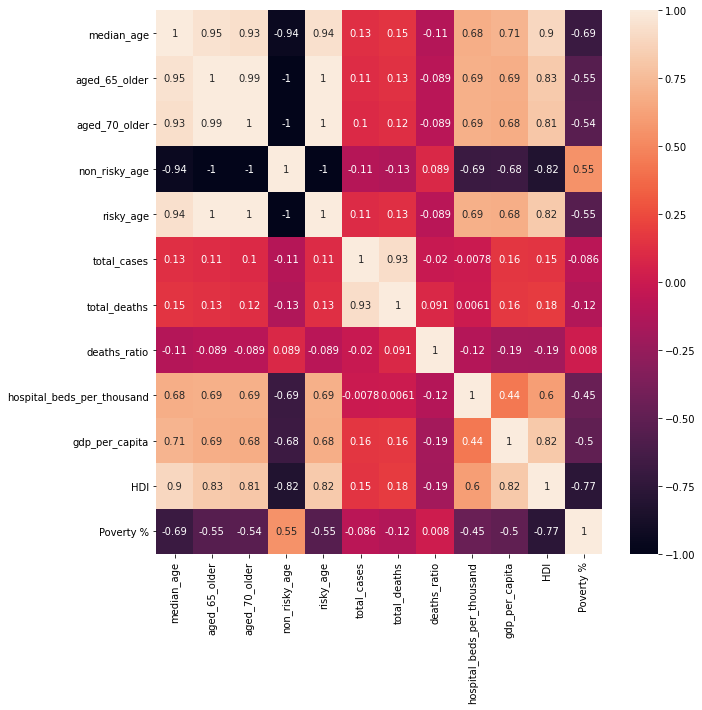

In [12]:
# Hacemos un heatmap para ver la correlacion entre las diferentes columnas del DataFrame
plt.figure(figsize=(10,10))
sns.heatmap(covid_data_pobreza.corr(), annot=True)

In [13]:
covid_data_pobreza.corr()

"""Interpretación de las correlaciones: 

median_age : 
- Mucha correlación positiva: cuanto mayor 

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-2e88d1a32966>, line 6)